## Libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets
import idx2numpy

## Functions

In [116]:
#     Features:(n_examples, n_features)
#     Labels: (n_examples, 1)
#     Weights:(n_features, 1)


# -- Sigmoid function -- #
def sigmoid(z):
    " Return the sigmoid function "
    y = 1/(1 + np.exp(-z))
    return y

# -- Predictor function -- #
def predict(features, weights):
    '''
    Returns probabilities
    of class label
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

# -- Cost function -- #
def cost_function(features, labels, weights):
    '''    
    Write down the average cross-entropy loss
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    # You may use this format or define in your own way
    # Note: This is for binary cros-entropy loss.
    
    # We can divide the binary cross entropy loss into two parts
    # One for p(y=1) and another for p(y=0)

    # Take the error when label=1
    class1_cost = np.dot(labels, np.log(predictions))

    # Take the error when label=0
    class2_cost = np.dot((1 - labels), np.log(1 - predictions))

    # Take the sum of both costs
    cost = class1_cost + class2_cost

    # Take the average cost
    cost = - (cost/observations)

    return cost


def update_weights(features, labels, weights, lr):
    '''
   Gradient Descent
    '''
    N = len(features.columns)# number of features

    #1 - Get Predictions
    predictions = predict(features, weights)
    

    gradient = np.dot((predictions - labels) , features)# Write down the gradient of the cost

    # 3 Take the average cost derivative for each feature
    gradient /= N

    # 4 Update the weights using the learning rate lr
    weights = weights - lr * gradient# Write down the update rule here

    return weights

def decision_boundary(prob):
    if prob >= .3 :
        return 1 
    elif prob >= .6 :
        return -1
    else :
        return 0 # You may change the threshold from 0.5 

def train(features, labels, weights, lr, iters):
    cost_history = [np.float64('inf')]

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        
        cost_history.append(cost)

        print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

## Data

In [152]:
data = sklearn.datasets.make_classification(n_samples=1000, n_classes=10,n_clusters_per_class=1, n_features= 10,n_informative=10, n_redundant=0, n_repeated=0)

In [153]:
X = pd.DataFrame(data[0])# Features
y = data[1]# Target labels

In [154]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [155]:
train_data = []
for i in np.unique(y_train) :
    l1 = np.zeros(len(y_train))
    l1[np.where(y_train == i)] = 1
    train_data.append(l1)


In [156]:
test_data = []
for i in np.unique(y_test) :
    l1 = np.zeros(len(y_test))
    l1[np.where(y_test == i)] = 1
    test_data.append(l1)

In [157]:
weights = []
losses = []
for i in train_data :
    # Initialize the weights
    wts = np.random.normal(0, 1, len(x_train.columns))
    # Training
    optimal_wts, loss = train(x_train, i, wts, 1e-5, 1000)
    weights.append(optimal_wts)
    losses.append(loss)
    

iter: 0 cost: 2.6069482941795767
iter: 1 cost: 2.6063247943592027
iter: 2 cost: 2.605701410232643
iter: 3 cost: 2.605078141799082
iter: 4 cost: 2.6044549890582185
iter: 5 cost: 2.6038319520287523
iter: 6 cost: 2.6032090306986846
iter: 7 cost: 2.6025862250760685
iter: 8 cost: 2.6019635351641557
iter: 9 cost: 2.601340960973906
iter: 10 cost: 2.600718502496269
iter: 11 cost: 2.6000961597413816
iter: 12 cost: 2.599473932712211
iter: 13 cost: 2.5988518214149496
iter: 14 cost: 2.5982298258501997
iter: 15 cost: 2.5976079460173973
iter: 16 cost: 2.596986181931504
iter: 17 cost: 2.5963645335880807
iter: 18 cost: 2.595743000991392
iter: 19 cost: 2.595121584146341
iter: 20 cost: 2.594500283055087
iter: 21 cost: 2.5938790977301136
iter: 22 cost: 2.593258028160704
iter: 23 cost: 2.592637074359455
iter: 24 cost: 2.592016236334898
iter: 25 cost: 2.5913955140784934
iter: 26 cost: 2.5907749076042537
iter: 27 cost: 2.5901544169105466
iter: 28 cost: 2.5895340420039576
iter: 29 cost: 2.5889137828901903
it

iter: 665 cost: 2.2181802144763343
iter: 666 cost: 2.217635267741487
iter: 667 cost: 2.2170904427349116
iter: 668 cost: 2.216545739472346
iter: 669 cost: 2.216001157969356
iter: 670 cost: 2.2154566982408657
iter: 671 cost: 2.2149123603032024
iter: 672 cost: 2.214368144171199
iter: 673 cost: 2.2138240498615067
iter: 674 cost: 2.2132800773886045
iter: 675 cost: 2.2127362267685275
iter: 676 cost: 2.2121924980181142
iter: 677 cost: 2.211648891151253
iter: 678 cost: 2.211105406184833
iter: 679 cost: 2.210562043134591
iter: 680 cost: 2.21001880201604
iter: 681 cost: 2.209475682845282
iter: 682 cost: 2.2089326856381213
iter: 683 cost: 2.2083898104103037
iter: 684 cost: 2.207847057177797
iter: 685 cost: 2.2073044259572514
iter: 686 cost: 2.2067619167636097
iter: 687 cost: 2.206219529613835
iter: 688 cost: 2.2056772645232825
iter: 689 cost: 2.205135121508599
iter: 690 cost: 2.2045931005854955
iter: 691 cost: 2.2040512017708123
iter: 692 cost: 2.2035094250801266
iter: 693 cost: 2.202967770529476

iter: 341 cost: 1.6677702595033699
iter: 342 cost: 1.6670514274247128
iter: 343 cost: 1.6663329321906313
iter: 344 cost: 1.6656147737861646
iter: 345 cost: 1.6648969521963206
iter: 346 cost: 1.6641794674061015
iter: 347 cost: 1.663462319400744
iter: 348 cost: 1.6627455081640523
iter: 349 cost: 1.6620290336809547
iter: 350 cost: 1.66131289593599
iter: 351 cost: 1.6605970949132638
iter: 352 cost: 1.6598816305967392
iter: 353 cost: 1.6591665029703973
iter: 354 cost: 1.6584517120182187
iter: 355 cost: 1.65773725772379
iter: 356 cost: 1.6570231400707032
iter: 357 cost: 1.656309359041698
iter: 358 cost: 1.6555959146208858
iter: 359 cost: 1.6548828067910224
iter: 360 cost: 1.6541700355352271
iter: 361 cost: 1.653457600835682
iter: 362 cost: 1.6527455026756726
iter: 363 cost: 1.6520337410372803
iter: 364 cost: 1.651322315903049
iter: 365 cost: 1.6506112272553646
iter: 366 cost: 1.6499004750757695
iter: 367 cost: 1.6491900593468332
iter: 368 cost: 1.6484799800497507
iter: 369 cost: 1.6477702371

iter: 32 cost: 2.4189650608013475
iter: 33 cost: 2.418470415873305
iter: 34 cost: 2.417975863336605
iter: 35 cost: 2.417481399510421
iter: 36 cost: 2.4169870264138438
iter: 37 cost: 2.4164927417185464
iter: 38 cost: 2.415998548083573
iter: 39 cost: 2.41550444572806
iter: 40 cost: 2.4150104322133847
iter: 41 cost: 2.414516509696406
iter: 42 cost: 2.4140226782084824
iter: 43 cost: 2.413528934242972
iter: 44 cost: 2.4130352816683676
iter: 45 cost: 2.412541720072153
iter: 46 cost: 2.412048248359522
iter: 47 cost: 2.4115548660426187
iter: 48 cost: 2.411061572734897
iter: 49 cost: 2.410568371611298
iter: 50 cost: 2.410075257996225
iter: 51 cost: 2.4095822362624295
iter: 52 cost: 2.4090893047800965
iter: 53 cost: 2.408596462522409
iter: 54 cost: 2.4081037126226432
iter: 55 cost: 2.4076110505265786
iter: 56 cost: 2.4071184792380467
iter: 57 cost: 2.4066259973160298
iter: 58 cost: 2.406133606537997
iter: 59 cost: 2.405641305436277
iter: 60 cost: 2.4051490934533004
iter: 61 cost: 2.4046569732406

iter: 712 cost: 2.1032677516549283
iter: 713 cost: 2.1028337058956112
iter: 714 cost: 2.1023997479671617
iter: 715 cost: 2.1019658778227917
iter: 716 cost: 2.1015320956327477
iter: 717 cost: 2.1010984013622864
iter: 718 cost: 2.1006647950249984
iter: 719 cost: 2.1002312765429205
iter: 720 cost: 2.099797845802774
iter: 721 cost: 2.0993645030449604
iter: 722 cost: 2.098931248162665
iter: 723 cost: 2.0984980810324867
iter: 724 cost: 2.098065001908674
iter: 725 cost: 2.0976320105271697
iter: 726 cost: 2.0971991071002862
iter: 727 cost: 2.0967662914091596
iter: 728 cost: 2.0963335636280926
iter: 729 cost: 2.0959009236532786
iter: 730 cost: 2.09546837147285
iter: 731 cost: 2.0950359071973805
iter: 732 cost: 2.0946035307833024
iter: 733 cost: 2.0941712420202534
iter: 734 cost: 2.093739041231567
iter: 735 cost: 2.093306928161571
iter: 736 cost: 2.0928749029220337
iter: 737 cost: 2.092442965541862
iter: 738 cost: 2.092011115925064
iter: 739 cost: 2.091579354167504
iter: 740 cost: 2.091147680145

iter: 368 cost: 2.0098203921828137
iter: 369 cost: 2.0090299896859367
iter: 370 cost: 2.0082398713570084
iter: 371 cost: 2.0074500372325605
iter: 372 cost: 2.0066604873495626
iter: 373 cost: 2.005871221744656
iter: 374 cost: 2.005082240454076
iter: 375 cost: 2.0042935435143234
iter: 376 cost: 2.003505130961275
iter: 377 cost: 2.0027170028308516
iter: 378 cost: 2.00192915915872
iter: 379 cost: 2.001141599980282
iter: 380 cost: 2.0003543253307523
iter: 381 cost: 1.9995673352451422
iter: 382 cost: 1.9987806297586292
iter: 383 cost: 1.9979942089056153
iter: 384 cost: 1.9972080727204742
iter: 385 cost: 1.996422221237679
iter: 386 cost: 1.995636654491254
iter: 387 cost: 1.9948513725152142
iter: 388 cost: 1.9940663753432148
iter: 389 cost: 1.9932816630085899
iter: 390 cost: 1.992497235544787
iter: 391 cost: 1.9917130929847802
iter: 392 cost: 1.9909292353618073
iter: 393 cost: 1.990145662708258
iter: 394 cost: 1.989362375056794
iter: 395 cost: 1.9885793724397842
iter: 396 cost: 1.9877966548893

iter: 12 cost: 2.2966302803946648
iter: 13 cost: 2.2961378615715593
iter: 14 cost: 2.295645543063212
iter: 15 cost: 2.295153325694786
iter: 16 cost: 2.2946612090999436
iter: 17 cost: 2.2941691933100703
iter: 18 cost: 2.2936772783544996
iter: 19 cost: 2.2931854638707443
iter: 20 cost: 2.292693750673184
iter: 21 cost: 2.2922021376201203
iter: 22 cost: 2.2917106259103197
iter: 23 cost: 2.2912192147974495
iter: 24 cost: 2.2907279043098465
iter: 25 cost: 2.2902366944824983
iter: 26 cost: 2.2897455857261324
iter: 27 cost: 2.2892545773061492
iter: 28 cost: 2.288763669634923
iter: 29 cost: 2.2882728627446385
iter: 30 cost: 2.287782156664265
iter: 31 cost: 2.287291551421814
iter: 32 cost: 2.2868010462939035
iter: 33 cost: 2.286310642441026
iter: 34 cost: 2.285820338767594
iter: 35 cost: 2.285330136052625
iter: 36 cost: 2.284840033581641
iter: 37 cost: 2.284350032125662
iter: 38 cost: 2.283860131346285
iter: 39 cost: 2.283370330903987
iter: 40 cost: 2.2828806311979744
iter: 41 cost: 2.2823910318

iter: 710 cost: 1.9770805029092247
iter: 711 cost: 1.9766570998063064
iter: 712 cost: 1.9762337947981639
iter: 713 cost: 1.9758105878312722
iter: 714 cost: 1.97538747889544
iter: 715 cost: 1.9749644680256777
iter: 716 cost: 1.974541555211789
iter: 717 cost: 1.9741187404443787
iter: 718 cost: 1.9736960237578682
iter: 719 cost: 1.9732734050994545
iter: 720 cost: 1.9728508845031751
iter: 721 cost: 1.9724284619175427
iter: 722 cost: 1.9720061374194526
iter: 723 cost: 1.9715839109570095
iter: 724 cost: 1.9711617825219236
iter: 725 cost: 1.9707397521483696
iter: 726 cost: 1.970317819785672
iter: 727 cost: 1.9698959855101252
iter: 728 cost: 1.969474249229038
iter: 729 cost: 1.9690526110189037
iter: 730 cost: 1.9686310708712165
iter: 731 cost: 1.968209628695352
iter: 732 cost: 1.967788284608196
iter: 733 cost: 1.967367038560527
iter: 734 cost: 1.9669458905040662
iter: 735 cost: 1.9665248405137123
iter: 736 cost: 1.9661038885409354
iter: 737 cost: 1.9656830346200567
iter: 738 cost: 1.9652622787

iter: 404 cost: 3.398163635945459
iter: 405 cost: 3.397231555337055
iter: 406 cost: 3.396299594360628
iter: 407 cost: 3.3953678291599045
iter: 408 cost: 3.394436183389827
iter: 409 cost: 3.3935046983063972
iter: 410 cost: 3.392573372574908
iter: 411 cost: 3.3916421696703787
iter: 412 cost: 3.3907111631975884
iter: 413 cost: 3.3897802787744116
iter: 414 cost: 3.3888495573827386
iter: 415 cost: 3.387918995314276
iter: 416 cost: 3.386988592586276
iter: 417 cost: 3.386058352665395
iter: 418 cost: 3.3851282384079338
iter: 419 cost: 3.3841982846042122
iter: 420 cost: 3.3832684934950135
iter: 421 cost: 3.382338864083083
iter: 422 cost: 3.3814093973502497
iter: 423 cost: 3.380480058559534
iter: 424 cost: 3.3795508823105447
iter: 425 cost: 3.37862186901282
iter: 426 cost: 3.3776929866656986
iter: 427 cost: 3.376764298984972
iter: 428 cost: 3.3758357424739365
iter: 429 cost: 3.3749073169729273
iter: 430 cost: 3.373979089201299
iter: 431 cost: 3.3730509918781006
iter: 432 cost: 3.3721230594111398

iter: 78 cost: 1.5733540457121262
iter: 79 cost: 1.5727872418747966
iter: 80 cost: 1.572220624433526
iter: 81 cost: 1.571654193394103
iter: 82 cost: 1.5710879487624365
iter: 83 cost: 1.570521890544523
iter: 84 cost: 1.569956018746219
iter: 85 cost: 1.5693903333736734
iter: 86 cost: 1.5688248344331328
iter: 87 cost: 1.5682595219304512
iter: 88 cost: 1.567694395872314
iter: 89 cost: 1.5671294562647804
iter: 90 cost: 1.5665647031145693
iter: 91 cost: 1.5660001364279228
iter: 92 cost: 1.5654357562115495
iter: 93 cost: 1.564871562472088
iter: 94 cost: 1.564307555216254
iter: 95 cost: 1.5637437344507297
iter: 96 cost: 1.5631801001825705
iter: 97 cost: 1.5626166524186564
iter: 98 cost: 1.5620533911659382
iter: 99 cost: 1.5614903164315277
iter: 100 cost: 1.5609274282225984
iter: 101 cost: 1.5603647265464864
iter: 102 cost: 1.5598022114103083
iter: 103 cost: 1.5592398828216236
iter: 104 cost: 1.558677740787826
iter: 105 cost: 1.5581157853163858
iter: 106 cost: 1.5575540164150479
iter: 107 cost:

iter: 753 cost: 1.234024958286807
iter: 754 cost: 1.2335882703927843
iter: 755 cost: 1.2331517824411373
iter: 756 cost: 1.2327154944402352
iter: 757 cost: 1.2322794063984381
iter: 758 cost: 1.2318435183238852
iter: 759 cost: 1.231407830224682
iter: 760 cost: 1.2309723421087166
iter: 761 cost: 1.2305370539838645
iter: 762 cost: 1.2301019658577763
iter: 763 cost: 1.2296670777380494
iter: 764 cost: 1.2292323896320796
iter: 765 cost: 1.2287979015472457
iter: 766 cost: 1.2283636134907172
iter: 767 cost: 1.2279295254696019
iter: 768 cost: 1.2274956374908106
iter: 769 cost: 1.2270619495611625
iter: 770 cost: 1.2266284616873757
iter: 771 cost: 1.2261951738760233
iter: 772 cost: 1.2257620861335672
iter: 773 cost: 1.2253291984662988
iter: 774 cost: 1.224896510880443
iter: 775 cost: 1.224464023382025
iter: 776 cost: 1.2240317359770527
iter: 777 cost: 1.2235996486712808
iter: 778 cost: 1.2231677614704286
iter: 779 cost: 1.22273607438009
iter: 780 cost: 1.222304587405629
iter: 781 cost: 1.221873300

iter: 427 cost: 2.65054008625948
iter: 428 cost: 2.649695050239143
iter: 429 cost: 2.6488501614258233
iter: 430 cost: 2.6480054504001425
iter: 431 cost: 2.6471608879059314
iter: 432 cost: 2.646316500937826
iter: 433 cost: 2.645472235585525
iter: 434 cost: 2.6446281745903524
iter: 435 cost: 2.643784239989147
iter: 436 cost: 2.642940479457366
iter: 437 cost: 2.6420969001581445
iter: 438 cost: 2.6412534434719386
iter: 439 cost: 2.6404101630168078
iter: 440 cost: 2.6395670376641225
iter: 441 cost: 2.638724064141436
iter: 442 cost: 2.6378812698446454
iter: 443 cost: 2.637038628063497
iter: 444 cost: 2.6361961409993495
iter: 445 cost: 2.635353832664318
iter: 446 cost: 2.6345116526489623
iter: 447 cost: 2.633669655001141
iter: 448 cost: 2.632827809259991
iter: 449 cost: 2.6319861456921543
iter: 450 cost: 2.631144610713292
iter: 451 cost: 2.6303032595297293
iter: 452 cost: 2.629462062363934
iter: 453 cost: 2.6286210252089854
iter: 454 cost: 2.627780140614304
iter: 455 cost: 2.62693941739301
it

iter: 101 cost: 2.298135929425124
iter: 102 cost: 2.2969086387572237
iter: 103 cost: 2.2956819074375012
iter: 104 cost: 2.2944557356766064
iter: 105 cost: 2.2932301236973243
iter: 106 cost: 2.2920050717065545
iter: 107 cost: 2.2907805799139402
iter: 108 cost: 2.2895566485349033
iter: 109 cost: 2.2883332777854695
iter: 110 cost: 2.2871104678642245
iter: 111 cost: 2.2858882189856615
iter: 112 cost: 2.2846665313604277
iter: 113 cost: 2.2834454051955144
iter: 114 cost: 2.282224840695488
iter: 115 cost: 2.2810048380680543
iter: 116 cost: 2.2797853975173252
iter: 117 cost: 2.278566519247001
iter: 118 cost: 2.2773482034660826
iter: 119 cost: 2.2761304503723645
iter: 120 cost: 2.2749132601721125
iter: 121 cost: 2.273696633066403
iter: 122 cost: 2.2724805692502734
iter: 123 cost: 2.2712650689302127
iter: 124 cost: 2.270050132305616
iter: 125 cost: 2.268835759572852
iter: 126 cost: 2.2676219509263285
iter: 127 cost: 2.26640870657104
iter: 128 cost: 2.2651960266984883
iter: 129 cost: 2.2639839115

iter: 789 cost: 1.5902389214995507
iter: 790 cost: 1.5894047931409157
iter: 791 cost: 1.5885711911048732
iter: 792 cost: 1.5877381151346963
iter: 793 cost: 1.5869055649738149
iter: 794 cost: 1.5860735403656867
iter: 795 cost: 1.585242041052973
iter: 796 cost: 1.584411066778755
iter: 797 cost: 1.583580617285461
iter: 798 cost: 1.5827506923156391
iter: 799 cost: 1.581921291611658
iter: 800 cost: 1.5810924149154217
iter: 801 cost: 1.5802640619688986
iter: 802 cost: 1.579436232513919
iter: 803 cost: 1.5786089262920342
iter: 804 cost: 1.5777821430446974
iter: 805 cost: 1.5769558825131726
iter: 806 cost: 1.5761301444385072
iter: 807 cost: 1.5753049285616911
iter: 808 cost: 1.5744802346235418
iter: 809 cost: 1.5736560623646028
iter: 810 cost: 1.5728324115254884
iter: 811 cost: 1.5720092818466065
iter: 812 cost: 1.5711866730680686
iter: 813 cost: 1.5703645849299812
iter: 814 cost: 1.5695430171723033
iter: 815 cost: 1.5687219695348238
iter: 816 cost: 1.5679014417572583
iter: 817 cost: 1.5670814

iter: 472 cost: 1.715013158165209
iter: 473 cost: 1.714386337231087
iter: 474 cost: 1.713759715823112
iter: 475 cost: 1.713133293966402
iter: 476 cost: 1.7125070716732198
iter: 477 cost: 1.7118810489647598
iter: 478 cost: 1.7112552258650908
iter: 479 cost: 1.7106296024015635
iter: 480 cost: 1.710004178584142
iter: 481 cost: 1.7093789544362539
iter: 482 cost: 1.7087539299820422
iter: 483 cost: 1.7081291052434346
iter: 484 cost: 1.7075044802307604
iter: 485 cost: 1.706880054977191
iter: 486 cost: 1.7062558294992738
iter: 487 cost: 1.7056318038116318
iter: 488 cost: 1.705007977937056
iter: 489 cost: 1.7043843519035289
iter: 490 cost: 1.7037609257227837
iter: 491 cost: 1.7031376994193095
iter: 492 cost: 1.7025146730061953
iter: 493 cost: 1.7018918465137205
iter: 494 cost: 1.7012692199563313
iter: 495 cost: 1.7006467933513059
iter: 496 cost: 1.7000245667260365
iter: 497 cost: 1.6994025400967383
iter: 498 cost: 1.6987807134780426
iter: 499 cost: 1.698159086894154
iter: 500 cost: 1.6975376603

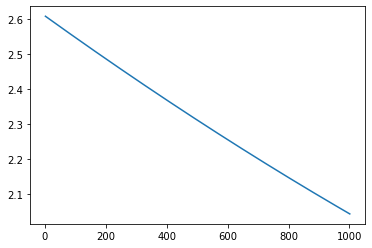

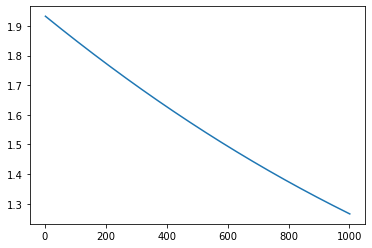

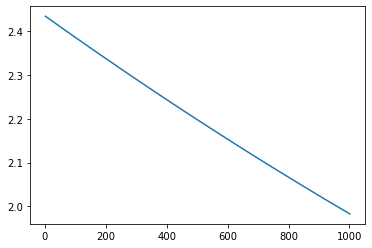

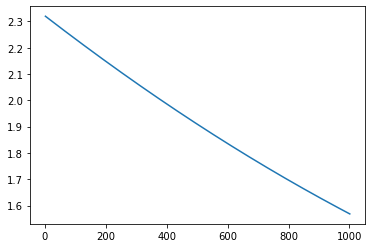

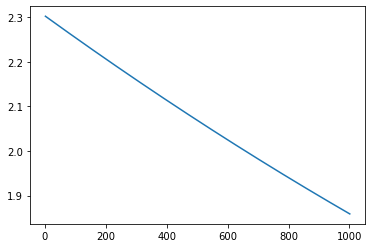

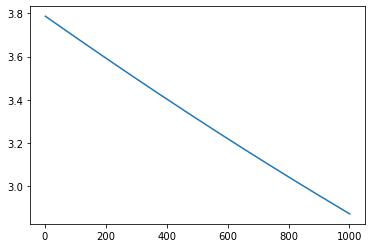

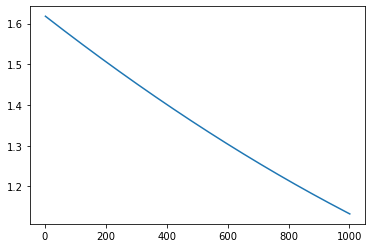

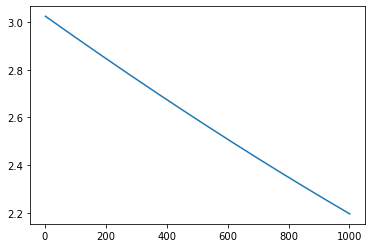

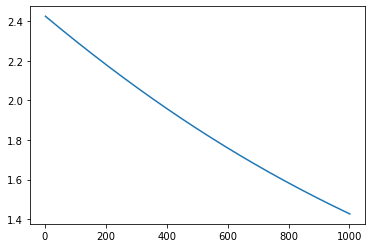

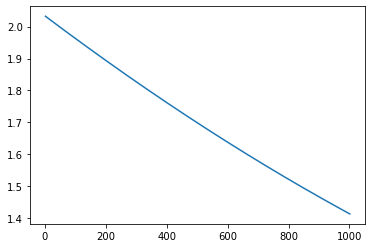

In [158]:
# Plot the loss against the number of epochs
for i in losses:
    plt.plot(np.arange(1, len(i)+1, 1), i)
    plt.show()

In [159]:
pred = []
for i in weights:
    predictions = []
    for elem in predict(x_train, i):
        predictions.append(decision_boundary(elem))
    pred.append(predictions)

In [160]:
test_pred = []
for i in weights:
    predictions = []
    for elem in predict(x_test, i):
        predictions.append(decision_boundary(elem))
    test_pred.append(predictions)

In [161]:
# Accuracy
for i in range(len(np.unique(y_train))):
    print("Training Accuracy using gradient descent: {}%".format(accuracy(pred[i],train_data[i]) * 100))

Training Accuracy using gradient descent: 54.37499999999999%
Training Accuracy using gradient descent: 47.12499999999999%
Training Accuracy using gradient descent: 50.125%
Training Accuracy using gradient descent: 47.75%
Training Accuracy using gradient descent: 54.0%
Training Accuracy using gradient descent: 44.125%
Training Accuracy using gradient descent: 59.00000000000001%
Training Accuracy using gradient descent: 47.62499999999999%
Training Accuracy using gradient descent: 46.0%
Training Accuracy using gradient descent: 50.24999999999999%


In [183]:
# Accuracy
gd_acc = []
for i in range(len(np.unique(y_test))):
    gd_acc.append(accuracy(test_pred[i],test_data[i]) * 100)
    print("Testing Accuracy using gradient descent: {}%".format(accuracy(test_pred[i],test_data[i]) * 100))

Testing Accuracy using gradient descent: 58.5%
Testing Accuracy using gradient descent: 44.49999999999999%
Testing Accuracy using gradient descent: 52.5%
Testing Accuracy using gradient descent: 53.0%
Testing Accuracy using gradient descent: 53.49999999999999%
Testing Accuracy using gradient descent: 45.49999999999999%
Testing Accuracy using gradient descent: 56.49999999999999%
Testing Accuracy using gradient descent: 43.99999999999999%
Testing Accuracy using gradient descent: 40.5%
Testing Accuracy using gradient descent: 50.5%


## Scikit-Learn module

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
# L-BFGS
clf_lbfgs = LogisticRegression(solver= "lbfgs").fit(x_train, y_train)

# Newton-CG
clf_newt = LogisticRegression(solver= "newton-cg").fit(x_train, y_train)

In [173]:
lbfgs_wt = clf_lbfgs.coef_
newt_wt = clf_newt.coef_

In [174]:
test_pred_lbfgs = []
for i in lbfgs_wt:
    predictions = []
    for elem in predict(x_test, i):
        predictions.append(decision_boundary(elem))
    test_pred_lbfgs.append(predictions)

In [175]:
test_pred_newt = []
for i in newt_wt:
    predictions = []
    for elem in predict(x_test, i):
        predictions.append(decision_boundary(elem))
    test_pred_newt.append(predictions)

In [182]:
lbfgs_acc = []
for i in range(len(np.unique(y_train))):
    lbfgs_acc.append(accuracy(test_pred_lbfgs[i],test_data[i]) * 100)
    print("Testing Accuracy using gradient descent: {}%".format(accuracy(test_pred_lbfgs[i],test_data[i]) * 100))

Testing Accuracy using gradient descent: 50.5%
Testing Accuracy using gradient descent: 56.49999999999999%
Testing Accuracy using gradient descent: 31.499999999999993%
Testing Accuracy using gradient descent: 49.0%
Testing Accuracy using gradient descent: 48.0%
Testing Accuracy using gradient descent: 47.5%
Testing Accuracy using gradient descent: 43.00000000000001%
Testing Accuracy using gradient descent: 32.99999999999999%
Testing Accuracy using gradient descent: 51.0%
Testing Accuracy using gradient descent: 56.49999999999999%


In [181]:
# Accuracy
newt_acc = []
for i in range(len(np.unique(y_test))):
    newt_acc.append(accuracy(test_pred_newt[i],test_data[i]) * 100)
    print("Testing Accuracy using gradient descent: {}%".format(accuracy(test_pred_newt[i],test_data[i]) * 100))

Testing Accuracy using gradient descent: 50.5%
Testing Accuracy using gradient descent: 56.49999999999999%
Testing Accuracy using gradient descent: 31.499999999999993%
Testing Accuracy using gradient descent: 49.0%
Testing Accuracy using gradient descent: 48.0%
Testing Accuracy using gradient descent: 47.5%
Testing Accuracy using gradient descent: 43.00000000000001%
Testing Accuracy using gradient descent: 32.99999999999999%
Testing Accuracy using gradient descent: 51.0%
Testing Accuracy using gradient descent: 56.49999999999999%
